# **Project Name**    - Retail Sales Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual

# **Project Summary -**

Rossman operates over 3000 drug stores in 7 Europian countries. There are two datasets given. The ultimate goal is to find insights from the data and fit machine learning model to pridict the sales. There are two dataset in which one dataset has information on storeid,sales,customers,promotions and holidays and the other dataset has store,assortment type, store type, promotion intervals and some information on competition. In this Regression project I will first go through the data like understanding the data, altering the data like altering null values and deleting duplicate values then, I will do data wrangling like merging, changing formats, label encoding and making the data ready fore proper visualiuzation. Then I will visualize the data to find the insights from the given data and get best possible information by visualization. Then I will perform some hypothesis testing and finally i will preproces the data and do feature engineering acording to the diffrent models and then fit a machine learning model and then I will check the accuracy of the model by using RMSE(Root Mean Squared Error)

















































# **GitHub Link -**

https://github.com/umerulla

# **Problem Statement**


This is an Regression project where there are two dataset named as rossman store data and store data .

 The rossman is an business that has variuos store in diffrent continents. Rossman stores data has store id, Date, Sales, Holiday information, Open and promotion data,
The store data has store id, store type, its competition information and promotion information.

 With these datasets we will merge them find and duplicates and null values, find Insights from the data, make the data ready to fit diffrent machine learning models and the ultimate goal is to fit a best possible model to predict the sales

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from scipy.stats import ttest_ind
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')
rossman_store_data = pd.read_csv('/content/drive/MyDrive/Regression project/Copy of Rossmann Stores Data.csv')
store_data = pd.read_csv('/content/drive/MyDrive/Regression project/Copy of store.csv')

Mounted at /content/drive


### Dataset First View

In [3]:
# Dataset First Look
rossman_store_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
rossman_store_data.shape

(1017209, 9)

In [6]:
store_data.shape

(1115, 10)

### Dataset Information

In [7]:
# Dataset Info
rossman_store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [8]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
print('The duplicate values in Rossman_store_data is',len(rossman_store_data[rossman_store_data.duplicated()]))

The duplicate values in Rossman_store_data is 0


In [10]:
# Dataset Duplicate Value Count
print('The duplicate values in Store_data is',len(store_data[store_data.duplicated()]))

The duplicate values in Store_data is 0


#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
rossman_store_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [12]:
store_data.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Text(0.5, 1.0, 'Total null values in each column')

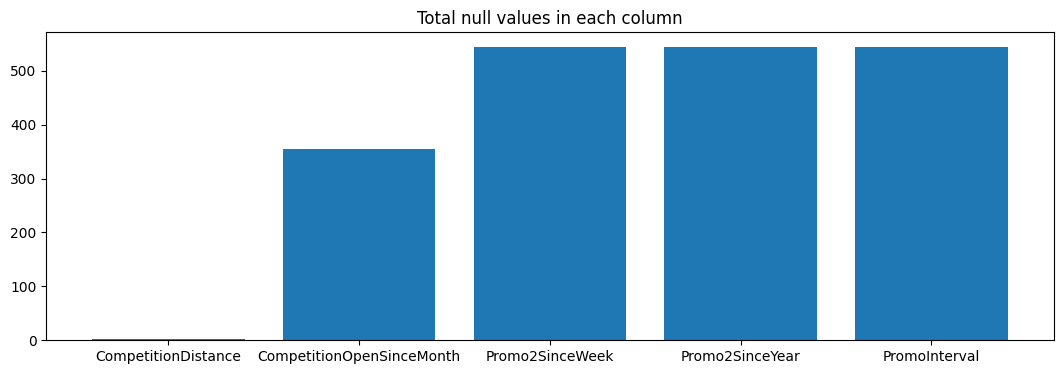

In [13]:
# Visualizing the missing values
null_values= store_data[['CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceMonth','Promo2SinceWeek','Promo2SinceYear','PromoInterval']].isnull().sum()
null_values

fig = plt.figure(figsize = (13,4))
plt.bar(null_values.index, null_values.values)
plt.title('Total null values in each column')


### What did you know about your dataset?

There are two datasets that has over 1017209 rows in rossman store data and 1115 rows in store data

In rossman store data we have information on the store id, the total sales with all the dates stating the holidays and with promotion offers or not

In store data we have information on store types, Assortment and information on its competition and promotional offers

Rossman store data has no duplicate and null values but in store data there are some null values which we will be filling with appropriate data

There are categorical features in both the datasets which should be replaced with numerical values in order to get best machine learning model


## ***2. Understanding Your Variables***

In [14]:
# Dataset Columns
rossman_store_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [15]:
store_data.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [16]:
# Dataset Describe
rossman_store_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [17]:
store_data.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


### Variables Description

**Rossman Store Data**

* Store - Unique store id
* DayOfWeek	- particular day of week
* Date- Date of sale made
* Sales- Sales for the day
* Customer- The total number customers for that day
* Open- The store was open or closed (0 = Closed, 1 = Open)
* Promo- Was there any promotion on that day
* StateHoliday- Public Holiday
* SchoolHoliday- School
* StoreType- States the type of store
* Assortment- Type of assortment level
* CompetitionDistance- The distance from its competition
* CompetitionOpenSinceMonth- States the month on which its competion started his store
* CompetitionOpenSinceYear- States the year from which its competition started his store
* Promo2- Store running consecutive promotion or not
* Promo2SinceWeek- the number of weeks the store is participating in the consecutive promotion
* Promo2SinceYear- states the year from which the store is participating in the consecutive promotion
* PromoInterval- States the intervals of the promotion

### Check Unique Values for each variable.

In [18]:
# Check Unique Values for each variable.
print(rossman_store_data.apply(lambda x : x.unique()))

Store            [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
DayOfWeek                                    [5, 4, 3, 2, 1, 7, 6]
Date             [2015-07-31, 2015-07-30, 2015-07-29, 2015-07-2...
Sales            [5263, 6064, 8314, 13995, 4822, 5651, 15344, 8...
Customers        [555, 625, 821, 1498, 559, 589, 1414, 833, 687...
Open                                                        [1, 0]
Promo                                                       [1, 0]
StateHoliday                                       [0, a, b, c, 0]
SchoolHoliday                                               [1, 0]
dtype: object


In [19]:
print(store_data.apply(lambda x : x.unique()))

Store                        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
StoreType                                                         [c, a, d, b]
Assortment                                                           [a, c, b]
CompetitionDistance          [1270.0, 570.0, 14130.0, 620.0, 29910.0, 310.0...
CompetitionOpenSinceMonth    [9.0, 11.0, 12.0, 4.0, 10.0, 8.0, nan, 3.0, 6....
CompetitionOpenSinceYear     [2008.0, 2007.0, 2006.0, 2009.0, 2015.0, 2013....
Promo2                                                                  [0, 1]
Promo2SinceWeek              [nan, 13.0, 14.0, 1.0, 45.0, 40.0, 26.0, 22.0,...
Promo2SinceYear              [nan, 2010.0, 2011.0, 2012.0, 2009.0, 2014.0, ...
PromoInterval                [nan, Jan,Apr,Jul,Oct, Feb,May,Aug,Nov, Mar,Ju...
dtype: object


## 3. ***Data Wrangling***

### Data Wrangling Code

##### Firstly we will fill the null values present in store_data

In [20]:
# Write your code to make your dataset analysis ready.

In [21]:
# The competition distance cannot be empty so we can fill with mean or median. we will apply median here because median values doesn't get affected by the outliers present in our data
store_data['CompetitionDistance'].fillna(store_data['CompetitionDistance'].median(), inplace = True)

# the rest columns will be filled by 0 because the column states that there can be no promotion offers and competition

store_data['CompetitionOpenSinceMonth'].fillna(0 , inplace = True)
store_data['CompetitionOpenSinceYear'].fillna(0 , inplace = True)
store_data['Promo2SinceWeek'].fillna(0 , inplace = True)
store_data['Promo2SinceYear'].fillna(0 , inplace = True)
store_data['PromoInterval'].fillna(0 , inplace = True)

print('After replacing null values the null values in store data are', store_data.isnull().sum())


After replacing null values the null values in store data are Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64


#### Merging both the Datasets

In [22]:
#  We will do left join as the on rossman_store_data and store_data because the data in store_data is present in rossman_store_data with Store
new_store_data = pd.merge(rossman_store_data, store_data, on='Store', how='left')
new_store_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [23]:
# Checking if the new dataset has any duplicate values
print('Total duplicate values in this dataset are:',len(new_store_data[new_store_data.duplicated()]))

Total duplicate values in this dataset are: 0


In [24]:
#Checking if the new dataset has any null values
new_store_data.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [25]:
print(new_store_data.apply(lambda x : x.unique()))

Store                        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
DayOfWeek                                                [5, 4, 3, 2, 1, 7, 6]
Date                         [2015-07-31, 2015-07-30, 2015-07-29, 2015-07-2...
Sales                        [5263, 6064, 8314, 13995, 4822, 5651, 15344, 8...
Customers                    [555, 625, 821, 1498, 559, 589, 1414, 833, 687...
Open                                                                    [1, 0]
Promo                                                                   [1, 0]
StateHoliday                                                   [0, a, b, c, 0]
SchoolHoliday                                                           [1, 0]
StoreType                                                         [c, a, d, b]
Assortment                                                           [a, c, b]
CompetitionDistance          [1270.0, 570.0, 14130.0, 620.0, 29910.0, 310.0...
CompetitionOpenSinceMonth    [9.0, 11.0, 12.0, 4.0, 

### Label Encoding

In [26]:
# Label Encoding
label_encoder = {'StoreType' : {'a':0 ,'b':1,'c':2 ,'d' :3} , 'Assortment':{'a':0 ,'b':1,'c':2}, 'StateHoliday' : {'0' :0 ,'a':1,'b':2 ,'c':3}}
new_store_data = new_store_data.replace(label_encoder)

In [27]:
# Converting float values to integers
new_store_data['CompetitionDistance'] = new_store_data['CompetitionDistance'].astype(int)
new_store_data['CompetitionOpenSinceMonth'] = new_store_data['CompetitionOpenSinceMonth'].astype(int)
new_store_data['CompetitionOpenSinceYear'] = new_store_data['CompetitionOpenSinceYear'].astype(int)
new_store_data['Promo2SinceWeek'] = new_store_data['Promo2SinceWeek'].astype(int)
new_store_data['Promo2SinceYear'] = new_store_data['Promo2SinceYear'].astype(int)

In [28]:
# Converting the data to appropriate format
new_store_data['CompetitionOpenSinceMonth'] = pd.DatetimeIndex(new_store_data['Date']).month

### Changing the format of DateTime


In [29]:
new_store_data['Date']=pd.to_datetime(new_store_data['Date'])
new_store_data['Year'] = new_store_data['Date'].apply(lambda x: x.year)
new_store_data['Month'] = new_store_data['Date'].apply(lambda x: x.month)
new_store_data['Day'] = new_store_data['Date'].apply(lambda x: x.day)

In [30]:
# There is some error in date and there is already diffrent column created seprately for date,month and year so we will drop date column
new_store_data.drop(['Date'], axis = 1 , inplace = True)

In [31]:
# Checking all the unique values so that for any Categorical column it can be converted to numerical column by Label Encoding

print(new_store_data.apply(lambda x : x.unique()))

Store                        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
DayOfWeek                                                [5, 4, 3, 2, 1, 7, 6]
Sales                        [5263, 6064, 8314, 13995, 4822, 5651, 15344, 8...
Customers                    [555, 625, 821, 1498, 559, 589, 1414, 833, 687...
Open                                                                    [1, 0]
Promo                                                                   [1, 0]
StateHoliday                                                      [0, 1, 2, 3]
SchoolHoliday                                                           [1, 0]
StoreType                                                         [2, 0, 3, 1]
Assortment                                                           [0, 2, 1]
CompetitionDistance          [1270, 570, 14130, 620, 29910, 310, 24000, 752...
CompetitionOpenSinceMonth              [7, 6, 5, 4, 3, 2, 1, 12, 11, 10, 9, 8]
CompetitionOpenSinceYear     [2008, 2007, 2006, 2009

### What all manipulations have you done and insights you found?

* Firstly I checked the duplicated values inj both the dataset and there were no duplicates found
* Then I checked null values in both dataset and in store data file there were some null values and I filled with values 0 because non null values were all numerical values
* Then I merged the dataset and I performed left join on rossman dataset on "STORE" Column
* Once again i checked the duplicate values in the merged dataset and there were no duplicates found
* I checked for null values once again in the merged dataset and obviously there were no n ull value found
* I checked the unique values of all features and there were some features that has datra like ( a,b,c,d) so i did label encoding and the values like (a became 0, b became 1, c became 3, and this continued till all the unique values were filled. There were at most 4 variables till d so label encoding was done)

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 (Bar plot)

###Distribution of customers according to the day of the week

Text(0.5, 1.0, 'Total number of customers visiting according to the days of the week')

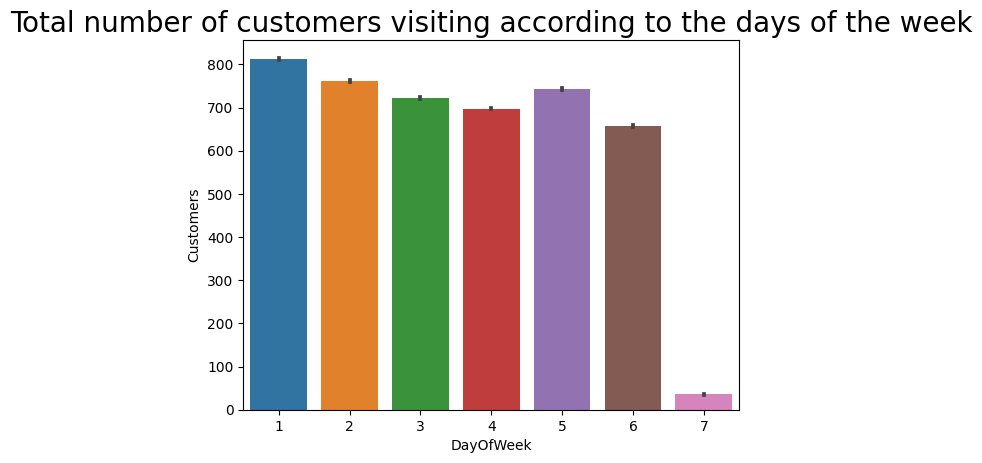

In [32]:
# Chart - 1 visualization code
sns.barplot(new_store_data, x = 'DayOfWeek', y = 'Customers')
plt.title('Total number of customers visiting according to the days of the week', fontsize = (20))

##### 1. Why did you pick the specific chart?

Bar plot helps us to compare the number of customers according to the day of week

##### 2. What is/are the insight(s) found from the chart?

As we can see the highest number of customers arrive on monday and least people visit on sunday

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There are least number of customers on Sunday so the stores can put some offers and discount especially on sundays to increase the customers count

#### Chart - 2 (Point Plot)

### Distribution of sales by competition open since year

Text(0.5, 1.0, 'Total sales according to the competition open since year')

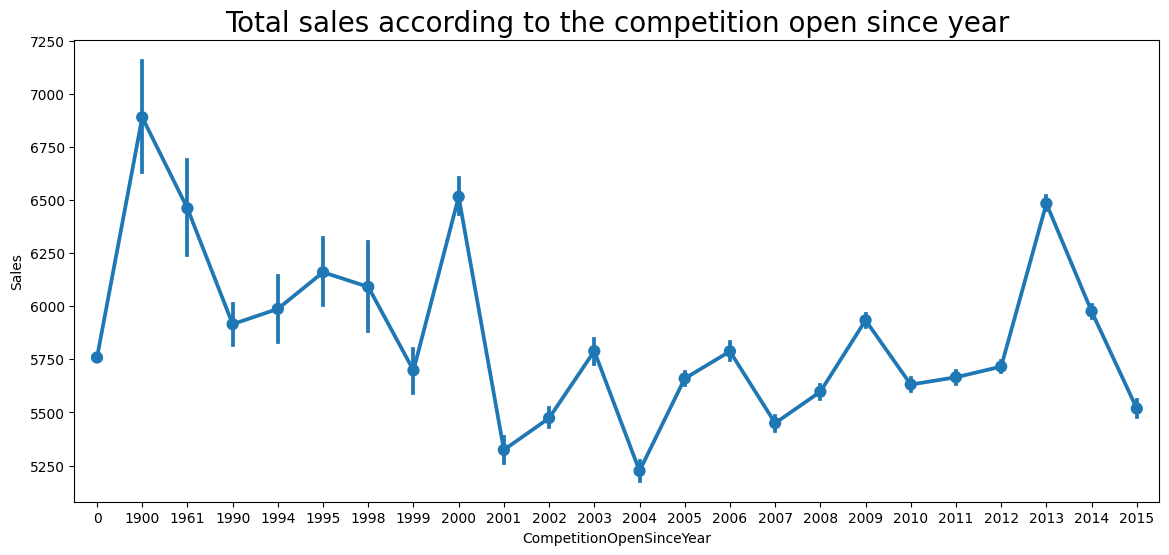

In [33]:
# Chart - 2 visualization code
plt.figure(figsize = (14,6))
sns.pointplot(new_store_data, x = 'CompetitionOpenSinceYear' , y = 'Sales')
plt.title ('Total sales according to the competition open since year', fontsize = (20))

##### 1. Why did you pick the specific chart?

point plot helps to understand the trend of sales here

##### 2. What is/are the insight(s) found from the chart?

At the begining the salels were high as there were very few competition and after 2000 the sales decreased as the copetition increased

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As we cann see the sales are being reduced as the number of competitors increased. The stores should create their brand value to maintain its sales and customers

#### Chart - 3 (Point Plot)

### Distribution of sales by competition open since month

Text(0.5, 1.0, 'Total sales according to the competition open since month')

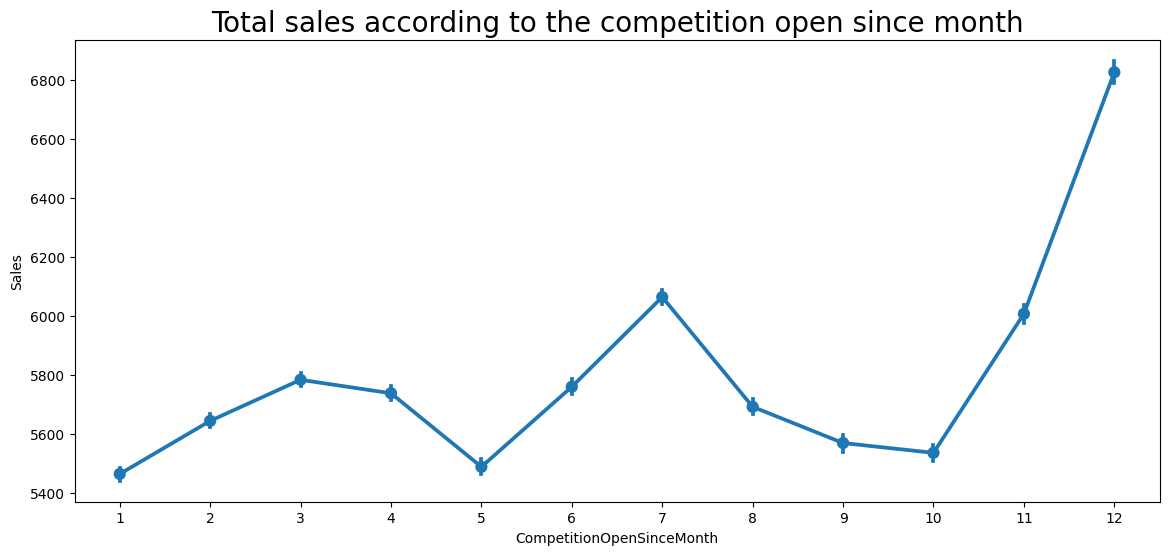

In [34]:
# Chart - 3 visualization code
plt.figure(figsize = (14,6))
sns.pointplot(new_store_data, x = 'CompetitionOpenSinceMonth' , y = 'Sales')
plt.title ('Total sales according to the competition open since month', fontsize = (20))

##### 1. Why did you pick the specific chart?

point plot helps to understand the trend of sales here

##### 2. What is/are the insight(s) found from the chart?

The sales are at peak from November to December

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The sales decreases especially from January till October.

#### Chart - 4 (Bar plot)

###The distribution of sales according to the store type

Text(0.5, 1.0, 'Total sales according to store type')

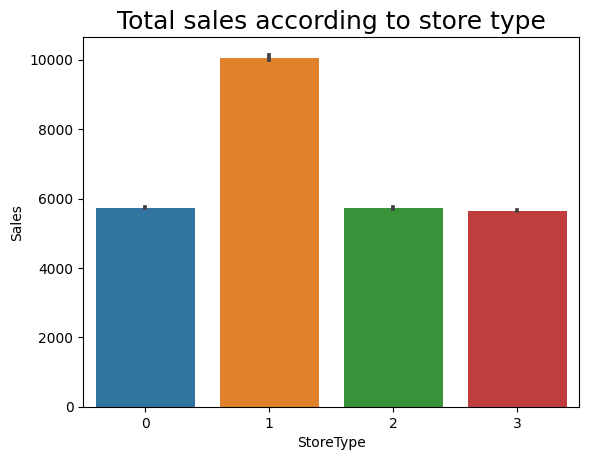

In [35]:
# Chart - 4 visualization code
sns.barplot(new_store_data, x = 'StoreType', y = 'Sales')
plt.title('Total sales according to store type', fontsize = (18))

##### 1. Why did you pick the specific chart?

Bar plot helps to compare sales of every store type

##### 2. What is/are the insight(s) found from the chart?

Store type 2 has highest Sales

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Only the store type 2 has highest sales and rest all types don't have such huge sales compared to store 2, Store 1,3,4 should be focused more for improving sales

#### Chart - 5 (Pie Chart)

###Pie plot showing the the the sales when the store runs promotional offers and the sales when there are no promotional offers

Text(0.5, 1.0, 'Total sales when the store has promotion or not')

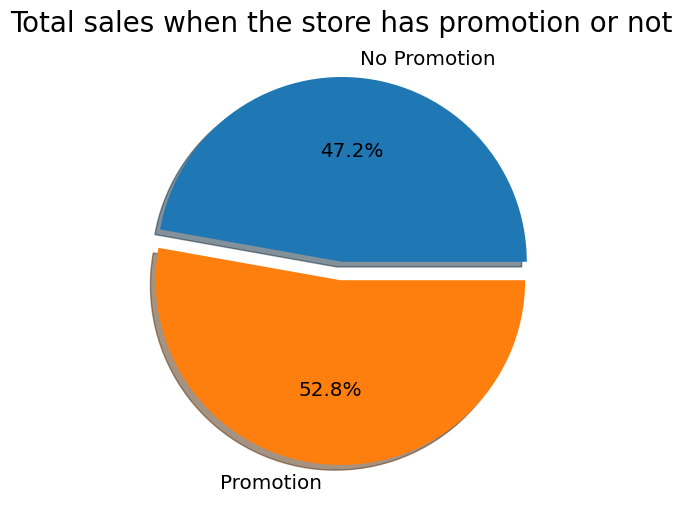

In [36]:
# Chart - 5 visualization code
# Creating a dataframe with total sales when there is promotion and when there is no promotions
diag = new_store_data.groupby(['Promo'])['Sales'].sum().reset_index().rename(columns = {'Sales':'Total Sales'})
fig, ax = plt.subplots(figsize=(6,6))
labels = ['No Promotion' ,'Promotion']
ax.pie(diag['Total Sales'], labels = labels,autopct = '%1.1f%%', textprops={'size': 'x-large'},explode =[0.05,0.05],shadow= True)
plt.title('Total sales when the store has promotion or not',fontsize = 20)

##### 1. Why did you pick the specific chart?

Pie plot helps to compare the v ariables as a whole

##### 2. What is/are the insight(s) found from the chart?

The sales are more when the store runs promotional offers

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The sales are not not affecting much when the store runs promotional offers. Maybe the promotional offers are not reachinng its targeted customers.

#### Chart - 6 (Bar plot)

### Bar plot showing the Distribution of sales acording to Assortment

Text(0.5, 1.0, 'Distribution of sales according to the Assortment')

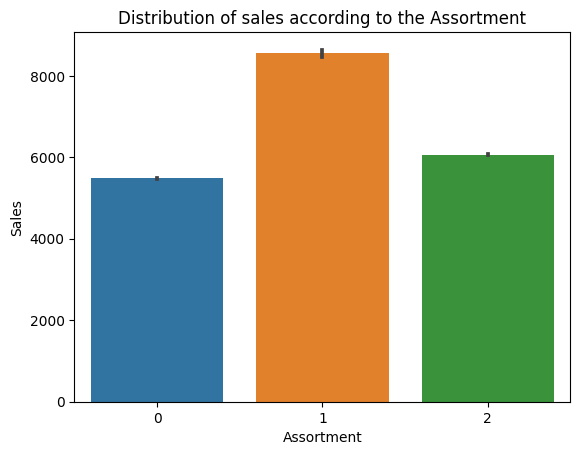

In [37]:
# Chart - 6 visualization code
sns.barplot(new_store_data, x = 'Assortment', y = 'Sales')
plt.title('Distribution of sales according to the Assortment')

##### 1. Why did you pick the specific chart?

Bar plot helps to compare various variables

##### 2. What is/are the insight(s) found from the chart?

the sales are high when the assortment is at 1

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As the sales are high on Assortment at 1 and the sales are low if the assortment is at 0 ands even the assortment is at 2

#### Chart - 7

### Pie plot to show the distribution of diffrent store types

Text(0.5, 1.0, 'Toal number of stores according to store types')

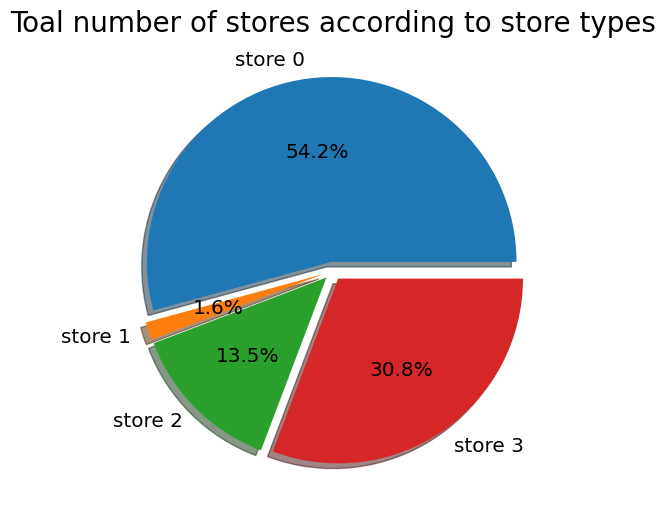

In [38]:
# Chart - 7 visualization code
newdf = new_store_data['StoreType'].value_counts().reset_index().rename(columns = {'index' : 'storetype', 'StoreType': 'total_stores'}).sort_values('storetype', ascending = True)

fig, ax = plt.subplots(figsize=(6,6))
labels = ['store 0','store 1','store 2','store 3']
ax.pie(newdf['total_stores'], labels = labels,autopct = '%1.1f%%', textprops={'size': 'x-large'},explode =[0.05,0.05, 0.05,0.05],shadow= True)
plt.title('Toal number of stores according to store types',fontsize = 20)

##### 1. Why did you pick the specific chart?

Pie plot helps to compare diffrent level at once

##### 2. What is/are the insight(s) found from the chart?

There are lots of store of store type 0 (around 52%)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There are very few around 1.6% of stores of store type 1. There should be plan to be made to increase the number of store with store type

#### Chart - 8 (Scatterplot)

### Realtionship between sales and Customers

Text(0.5, 1.0, ' Realtionship between Sales and Customers')

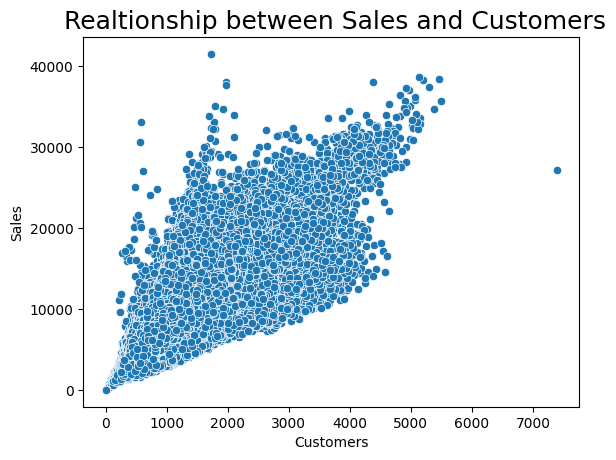

In [39]:
# Chart - 8 visualization code
sns.scatterplot(x = 'Customers' , y = 'Sales', data = new_store_data )
plt.title(' Realtionship between Sales and Customers', fontsize = 18)

##### 1. Why did you pick the specific chart?

Scatter plot helps to the relationship between the two variables

##### 2. What is/are the insight(s) found from the chart?

The scatter plot says that the sales are high when the customers incraese

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By seeing the scatter plot we can see few points shows high sales with even the customers are not much this means the rule of pareto principle is applicable

#### Chart - 9 (Heatmap)

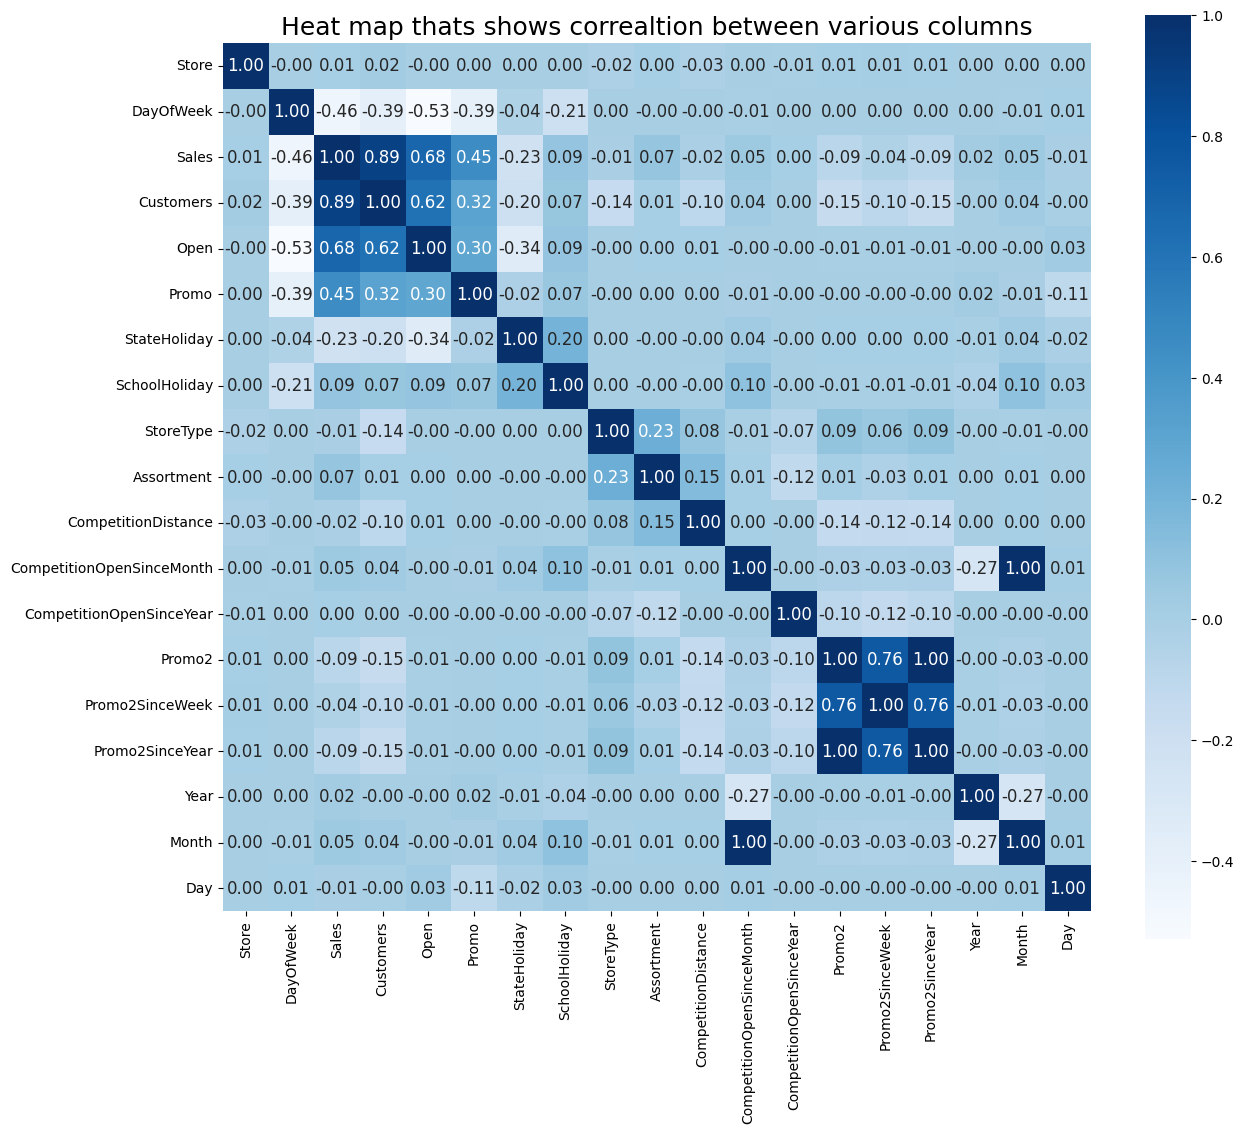

In [40]:
# Chart - 9 visualization code
correlation = new_store_data.corr()
fig, ax = plt.subplots(figsize = (14,12))
sns.heatmap(correlation, annot = True, fmt='.2f', annot_kws={'size': 12},  vmax=1, square=True, cmap="Blues")
ax.set_title('Heat map thats shows correaltion between various columns', fontsize = (18))
plt.show()

##### 1. Why did you pick the specific chart?

Heatmap helps us to know the correaltion between various variable

##### 2. What is/are the insight(s) found from the chart?

* There is negative correaltion of sales on day of the week this means sales dont affect much on the days of week
* sales with customers has the highest correaltion and that is obvious because the more the customers the more the sales
* The customers and promo is slightly positive correlated that means the number of customers increase as there is promotions

## ***5. Hypothesis Testing***

### Hypothetical Statement - 1 (testing is there any significance diffrence in sales when there is promotion or no promotion)

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0)**- There is no significance diffrence in sales when there is promotion or no promotion

**Alternate Hypothesis(H1)**- There is significance diffrence in sales when there is promotion and no promotion

#### 2. Perform an appropriate statistical test.

In [41]:
# Perform Statistical Test to obtain P-Value
no_promotion = new_store_data[new_store_data['Promo'] == 0] ['Sales']
promotion = new_store_data[new_store_data['Promo'] == 1 ] ['Sales']
t_stat , p_value = ttest_ind(no_promotion,promotion)
print('p value is ' , p_value)
print('t_stat value is', t_stat)
print ( 'The significancce (alpha) value is 0.05')
if p_value < 0.05:
  print(' We reject the null Hypothesis ')
else:
  print('We accept the null Hypothesis')


p value is  0.0
t_stat value is -511.54718673163774
The significancce (alpha) value is 0.05
 We reject the null Hypothesis 


#### As we reject the null hypothesis, We can conclude that there is a Significance diffrence when the store has promotions and when there are no promotions

##### Which statistical test have you done to obtain P-Value?

I have used two sample T test

##### Why did you choose the specific statistical test?

As both the columns are numerical and we are testing whether there is a significance diffrence or not so I used two sample T test

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [42]:
# Handling Missing Values & Missing Value Imputation
new_store_data.isnull().sum()

Store                        0
DayOfWeek                    0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Year                         0
Month                        0
Day                          0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values present

### 2. Handling Outliers

In [43]:
# Handling Outliers & Outlier treatments
def remove_outliers(new_store_data , colnames):
  q1 = new_store_data[colnames].quantile(0.25)
  q3 = new_store_data[colnames].quantile(0.75)
  iqr = q3-q1
  loweriqr= q1-1.5*iqr
  higheriqr=q3+1.5*iqr
  def_out = new_store_data.loc[(new_store_data[colnames] >loweriqr) & (new_store_data[colnames] <higheriqr)]
  return def_out

In [44]:
new_store_data = remove_outliers(new_store_data,'Sales')
print (new_store_data.shape)

(990515, 20)


In [45]:
new_store_data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,5263,555,1,1,0,1,2,0,1270,7,2008,0,0,0,0,2015,7,31
1,2,5,6064,625,1,1,0,1,0,0,570,7,2007,1,13,2010,"Jan,Apr,Jul,Oct",2015,7,31
2,3,5,8314,821,1,1,0,1,0,0,14130,7,2006,1,14,2011,"Jan,Apr,Jul,Oct",2015,7,31
3,4,5,13995,1498,1,1,0,1,2,2,620,7,2009,0,0,0,0,2015,7,31
4,5,5,4822,559,1,1,0,1,0,0,29910,7,2015,0,0,0,0,2015,7,31


##### What all outlier treatment techniques have you used and why did you use those techniques?

I used the IQR method to handle the outliers because in sales we cannot detect if there is an outlier or no by looking at other columns.. The sales can be high or low and by the customer column. there can be possibility that a customer purchased most amount of good from that store so the sales is high. So I used IQR method to remove outliers

### 3. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [46]:
# We will select only those rows when the store is Open because when the store is closed there will be no sales and customers
new_store_data = new_store_data[new_store_data.Open != 0]

In [47]:
# We will drop the Open column as there is only 1 value that is (1) present repeatedly all over the data
new_store_data = new_store_data.drop('Open', axis = 1)

#### 2. Feature Selection

In [48]:
# Select your features wisely to avoid overfitting
def calc_vif(x):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

    return(vif)

In [49]:
calc_vif(new_store_data[[i for i in new_store_data.describe().columns if i not in ['Sales','Day','Month','Year']]])

,variables,VIF
0,Store,3.597029e+00
1,DayOfWeek,4.372439e+00
2,Customers,5.329043e+00
3,Promo,1.920339e+00
4,StateHoliday,1.002415e+00
5,SchoolHoliday,1.266578e+00
6,StoreType,1.896727e+00
7,Assortment,2.040145e+00
8,CompetitionDistance,1.545986e+00
9,CompetitionOpenSinceMonth,3.764726e+00


In [50]:
# We will drop ['promo'] and ['Promo2SinceYear'] as the Vif score is pretty high and they are higly correlated with other variables
new_store_data.drop(['Promo2','Promo2SinceYear'],axis=1,inplace=True)

In [51]:
# Calculation of VIF after removing the Promo2 and Promo2SinceYear column
calc_vif(new_store_data[[i for i in new_store_data.describe().columns if i not in ['Sales']]])

,variables,VIF
0,Store,3.992689
1,DayOfWeek,5.835774
2,Customers,7.206522
3,Promo,2.023510
4,StateHoliday,1.002535
5,SchoolHoliday,1.283727
6,StoreType,1.990167
7,Assortment,2.056548
8,CompetitionDistance,1.600471
9,CompetitionOpenSinceMonth,inf


##### What all feature selection methods have you used  and why?

I used VIF(Vraiance Inflation Factor) to calculate the correlation of independent variables and removed the features with high VIF score

##### Which all features you found important and why?

Among all the features I removed ['Open'] ['Promo'] ['Promo2SinceYear'] features rest all the features are important

### 4. Categorical Encoding

In [52]:
# Encode your categorical columns
new_store_data = pd.get_dummies(new_store_data, columns = ['PromoInterval'])

In [53]:
new_store_data.head()

,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2SinceWeek,Year,Month,Day,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,5263,555,1,0,1,2,0,1270,7,2008,0,2015,7,31,1,0,0,0
1,2,5,6064,625,1,0,1,0,0,570,7,2007,13,2015,7,31,0,0,1,0
2,3,5,8314,821,1,0,1,0,0,14130,7,2006,14,2015,7,31,0,0,1,0
3,4,5,13995,1498,1,0,1,2,2,620,7,2009,0,2015,7,31,1,0,0,0
4,5,5,4822,559,1,0,1,0,0,29910,7,2015,0,2015,7,31,1,0,0,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

Regression model performs well on numerical data so I done label Encoding ( Converting categorical data into  numeric data) as the data is Ordinal. If the data was Nominal I would have used One Hot Encoding

### 5. Data Splitting

In [54]:
# Split your data to train and test. Choose Splitting ratio wisely.
X= new_store_data.drop(['Sales'],axis = 1)
Y=new_store_data['Sales']

print(X.shape)
print(Y.shape)

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size = 0.25, random_state=0)

(817698, 19)
(817698,)


##### What data splitting ratio have you used and why?

I have used 75-25 ratio as the model will get enough training data to learn

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [55]:
# Transform Your data
pt = PowerTransformer()
X_train= pt.fit_transform(X_train)
X_test=pt.transform(X_test)

I transformed my independent features as there may be some features with the skewness present in it. Powertransformer supports Box-Cox transform and the Yeo-Johnson transform. So there is no need to check skewness by the graph and apply tranformation like zscore, log transformation etc.

### 6. Data Scaling

In [56]:
# Scaling your data
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

##### Which method have you used to scale you data and why?

I used Standard Scaler to scale the data and Scaling the data is important for regression models which makes all the features mean to 0 and standard deviation to 1

## ***7. ML Model Implementation***

### ML Model - 1 (Linear Regression Model)

In [57]:
# Fitting Linear Regression model
lr = LinearRegression()
lr.fit(X_train,Y_train)

#Predicting the dependent variable by .predict method
Y_predicted = lr.predict(X_test)

In [58]:
#Comparing the acctual and predicted values
predicted_df = pd.DataFrame(zip(Y_test,Y_predicted),columns = ['Actual','Predicted'])
predicted_df

,Actual,Predicted
0,5570,7238.537076
1,6685,6832.537076
2,3472,2449.537076
3,3178,1333.787076
4,5513,7190.537076
...,...,...
204420,5513,5301.537076
204421,2669,2338.537076
204422,3010,3079.537076
204423,10204,9410.537076


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [59]:
# Evaluating the scores
print('R2 score oftraining data is',lr.score(X_train,Y_train))
print('R2 score testing data is',lr.score(X_test,Y_test))

MSE = mean_squared_error(Y_test,Y_predicted)
print('MSE:',MSE)

RMSE = math.sqrt(MSE)
print('RMSE: ',RMSE)

RMPSE = (RMSE/new_store_data['Sales'].mean())*100
print('RMPSE:', RMPSE)

R2 score oftraining data is 0.7569594764200447
R2 score testing data is 0.7541990188600304
MSE: 1490626.3901960775
RMSE:  1220.9121140344532
RMPSE: 18.440916528049296


### Ridge Regression

In [60]:
# Fitting Ridge model
ridge = Ridge(alpha= 5)
ridge.fit(X_train,Y_train)

#Predicting the dependent variable by .predict method
RY_predicted = ridge.predict(X_test)

# Evaluating the scores
print('R2 score oftraining data is',ridge.score(X_train,Y_train))
print('R2 score testing data is',ridge.score(X_test,Y_test))

MSE_ridge = mean_squared_error(Y_test,RY_predicted)
print('MSE of ridge regression:',MSE_ridge)

RMSE_ridge = math.sqrt(MSE_ridge)
print('RMSE of ridge regression: ',RMSE_ridge)

RMPSE_ridge = (RMSE_ridge/new_store_data['Sales'].mean())*100
print('RMPSE of ridge regression:', RMPSE_ridge)

R2 score oftraining data is 0.7569596627508356
R2 score testing data is 0.7542007095528287
MSE of ridge regression: 1490616.1372211257
RMSE of ridge regression:  1220.9079151275603
RMPSE of ridge regression: 18.44085310686555


#### 2. Cross- Validation & Hyperparameter Tuning

In [61]:
ridge = Ridge()

#Defining the hyperparameteres
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='r2', cv=5)
ridge_regressor.fit(X_train,Y_train)

#Evaluating best score and Aplha value
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("R2 score is ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 10}
R2 score is  0.7569382134862703


#### Ridge Regression model with the best hyperparameter found from GridSearchCV

In [62]:
#Fitting Ridge model with b est hyperparameter found
Ridge_model = Ridge(alpha=10)
Ridge_model.fit(X_train,Y_train)

#Predicting the dependent variable by .predict method
ridge_predicted= Ridge_model.predict(X_test)

# Evaluating the scores
print('R2 score oftraining data is',Ridge_model.score(X_train,Y_train))
print('R2 score testing data is',Ridge_model.score(X_test,Y_test))

MSE_ridge_tuned = mean_squared_error(Y_test,ridge_predicted)
print('MSE:',MSE_ridge_tuned)

RMSE_ridge_tuned = math.sqrt(MSE_ridge_tuned)
print('RMSE of tuned ridged regression: ',RMSE_ridge_tuned)

RMPSE_ridge_tuned = (RMSE_ridge_tuned/new_store_data['Sales'].mean())*100
print('RMPSE: of tuned ridged regression', RMPSE_ridge_tuned)

R2 score oftraining data is 0.7569596625228594
R2 score testing data is 0.7542007638988675
MSE: 1490615.8076470152
RMSE of tuned ridged regression:  1220.9077801566402
RMPSE: of tuned ridged regression 18.440851068236036


### Lasso Regression

In [63]:
#Fitting the lasso Regression model
lasso = Lasso()
lasso.fit(X_train,Y_train)

#Predicting the dependent variable by .predict method
LY_predicted = lasso.predict(X_test)

#Evaluating the scores
print('R2 score oftraining data is',lasso.score(X_train,Y_train))
print('R2 score testing data is',lasso.score(X_test,Y_test))

MSE_lasso = mean_squared_error(Y_test,LY_predicted)
print('MSE of lasso regression:',MSE_lasso)

RMSE_lasso = math.sqrt(MSE_lasso)
print('RMSE of lasso regression: ',RMSE_lasso)

RMPSE_lasso = (RMSE_lasso/new_store_data['Sales'].mean())*100
print('RMPSE of lasso regression:', RMPSE_lasso)

R2 score oftraining data is 0.7569520030136898
R2 score testing data is 0.7541960422693834
MSE of lasso regression: 1490644.4413224424
RMSE of lasso regression:  1220.919506487812
RMPSE of lasso regression: 18.441028185238835


##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCv to get best hyperparameter

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There is no much diffrence in the Model even after doining Hyperparameter Tuning

### ML Model - 2 (Decision Tree Regressor)

In [64]:
# splitting the data and creating train test split once again because the above varible of train test split was powertransformed and scaled
# In Decision tree regressor there is no need to powertransform and scale the data
A= new_store_data.drop(['Sales'],axis = 1)
B=new_store_data['Sales']

A_train,A_test,B_train,B_test = train_test_split(A,B,test_size = 0.25 , random_state = 0)

In [65]:
# Fitting Decision Tree Regressor Model
decision_tree_model= DecisionTreeRegressor(max_depth=5)
decision_tree_model.fit(A_train,B_train)

#Prediction of dependent variable B by using .predict method
decision_tree_predicted = decision_tree_model.predict(A_test)

#Evaluating the Scores
print('R2 score oftraining data is',decision_tree_model.score(A_train,B_train))
print('R2 score testing data is',decision_tree_model.score(A_test,B_test))

MSE_DT  = mean_squared_error(B_test, decision_tree_predicted)
print("MSE of Decision tree regressor :" , MSE_DT)

RMSE_DT = np.sqrt(MSE_DT)
print("RMSE of Decision Tree:" ,RMSE_DT)

RMPSE_DT = (RMSE_DT/new_store_data['Sales'].mean())*100
print('RMPSE of Decision Tree:', RMPSE_DT)

R2 score oftraining data is 0.7616642442086092
R2 score testing data is 0.7592013363883734
MSE of Decision tree regressor : 1460290.5205616008
RMSE of Decision Tree: 1208.4248096433641
RMPSE of Decision Tree: 18.252305623718538


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

I Used Decision Tree regressor model and the scores and MSE is not good thus it became an underfit model

#### 2. Cross- Validation & Hyperparameter Tuning

In [66]:
# Creating a dictionary of parameters and assinging various values for hyperparameter tuning
param_grid = {
    'criterion': ['mse', 'friedman_mse', 'mae'],
    'max_depth': [None, 5, 10, 20,30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto','sqrt']
}

# Create RandomizedSearchCV instance
randomized_search_CV = RandomizedSearchCV(DecisionTreeRegressor(), param_grid, cv=5)

# Fitting the model to find the best parameters
randomized_search_CV.fit(A_train,B_train)

# Printing the best parameters and corresponding accuracy
print("Best Parameters:", randomized_search_CV.best_params_)
print("Best Accuracy:", randomized_search_CV.best_score_)

Best Parameters: {'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 30, 'criterion': 'friedman_mse'}
Best Accuracy: 0.9469503385981592


#### Decision Tree Regressor with best hyperparameters found by RandomizedSearchCV

In [67]:
# Fitiing the Decision Tree Regressor model with best Hyperparameters
Dt_model = DecisionTreeRegressor(**randomized_search_CV.best_params_)
Dt_model.fit(A_train,B_train)

#Prediction of dependent variable B by using .predict method
Dt_model_predicted = Dt_model.predict(A_test)

#Evaluating the Scores
print('R2 score oftraining data is',Dt_model.score(A_train,B_train))
print('R2 score testing data is',Dt_model.score(A_test,B_test))

MSE_tuned_DT  = mean_squared_error(B_test, Dt_model_predicted)
print("MSE of best tuned Decision Tree :" , MSE_tuned_DT)

RMSE_tuned_DT = np.sqrt(MSE)
print("RMSE_dt_rf of best tuned Decision Tree :" ,RMSE_tuned_DT)

RMPSE_tuned_DT = (RMSE_tuned_DT/new_store_data['Sales'].mean())*100
print('RMPSE of best tuned Decision Tree:', RMPSE_tuned_DT)


R2 score oftraining data is 0.9843552054062523
R2 score testing data is 0.9502102191670891
MSE of best tuned Decision Tree : 301943.3076605696
RMSE_dt_rf of best tuned Decision Tree : 1220.9121140344532
RMPSE of best tuned Decision Tree: 18.440916528049296


##### Which hyperparameter optimization technique have you used and why?

I usede randomizedSearchCv because GridSearchCv takes a lot of time and RandomizedSearchCV picks random specified numbers and parameters from the paramater grid

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There is a lot more improvement in the model because the MSE(Mean SquaredError) reduced from 1460290.5 to 325344.6 which is a good thing for our model

### ML Model - 3 (Random Forest Regressor)

In [68]:
# Fitting Decision Tree Regressor Model
Random_forest_Model = RandomForestRegressor()
Random_forest_Model.fit(A_train,B_train)

#Prediction of dependent variable B by using .predict method
RF_Model_Predicted = Random_forest_Model.predict(A_test)

#Evaluating the Scores
print('R2 score oftraining data is',Random_forest_Model.score(A_train,B_train))
print('R2 score testing data is',Random_forest_Model.score(A_test,B_test))

MSE_RF_model  = mean_squared_error(B_test, RF_Model_Predicted)
print("MSE :" , MSE_RF_model)

RMSE_RF_model = np.sqrt(MSE_RF_model)
print("RMSE_RF :" ,RMSE_RF_model)

RMPSE_RF_model = (RMSE_RF_model/new_store_data['Sales'].mean())*100
print('RMPSE:', RMPSE_RF_model)

R2 score oftraining data is 0.9959162104671249
R2 score testing data is 0.9707510015681685
MSE : 177376.54563902802
RMSE_RF : 421.1609498030747
RMPSE: 6.361304659782656


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

I Used Random Forest Regressor as this model builds multiple decision tree and it is advanced model and we got our model much improved

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I used RMSE(Root Mean Squared Error) for evaluation metrics because RMSE is a average magnitude between predicted and actual values

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I will choose Random Forest Regressor as the Final model beacuse the RMSE is lowest compared to all the other models and even the accuracy is high

### Feature Importance

In [69]:
# Creating a series that shows the feature Importance
feature_importance = pd.Series(Random_forest_Model.feature_importances_ , index = [A_train.columns]).sort_values(ascending = True)
feature_importance

StateHoliday                      0.000198
SchoolHoliday                     0.000966
PromoInterval_Mar,Jun,Sept,Dec    0.001491
PromoInterval_Feb,May,Aug,Nov     0.001581
PromoInterval_0                   0.002050
PromoInterval_Jan,Apr,Jul,Oct     0.003371
Year                              0.003803
CompetitionOpenSinceMonth         0.004145
Month                             0.004181
Day                               0.008323
DayOfWeek                         0.013127
Assortment                        0.014635
CompetitionOpenSinceYear          0.018368
Promo2SinceWeek                   0.019169
Store                             0.039516
Promo                             0.045869
StoreType                         0.063091
CompetitionDistance               0.064740
Customers                         0.691376
dtype: float64

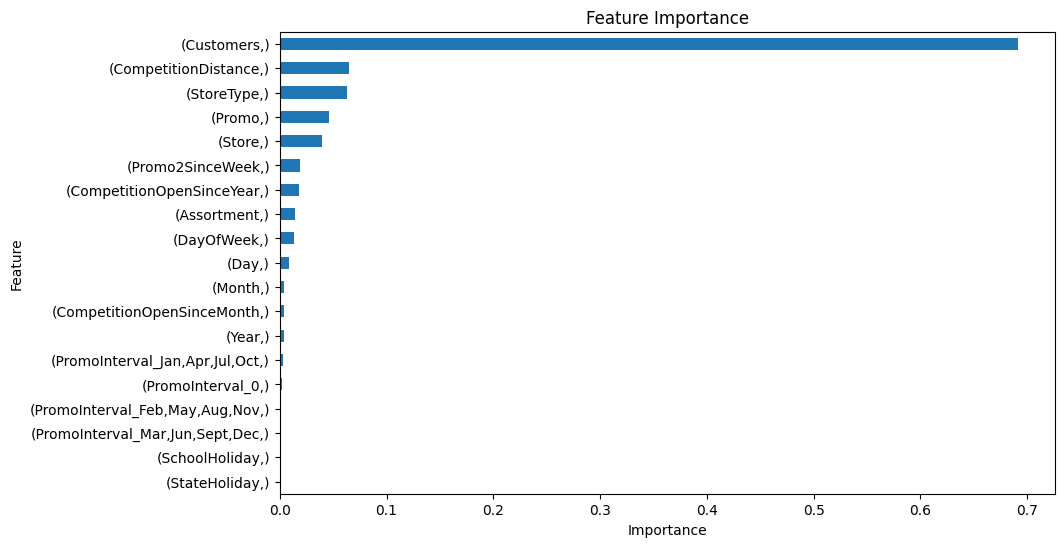

In [70]:
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

I used Random forest regressor and built feature importance

# **Conclusion**

We have analyzed the given data and built a machine learning model that will predict the sales based on the data given
Some of the key finding and insights are:-
* The sales have been decreasing as the number of competitors Increased. The store need to create a brand value beccause it builds trust and loyalty thus they ccan reatain thier customers even if there are multiple competitors
* There are 4 types of Stores and among all the stores 54.2% are Store type 0.
 still it generates equaly amoont of sales compared to store type 2,3.
* There are only 1.6% stores of type 1 but still it generates the maximum number of sales compared to rest every types of stores.
* The store type 1 should be expanded more to get most number of sales
* Store type 0 must be focused more because it generates lesser Sales and this types of store should be converted to  store type 1 to get most number of sales
* When the store runs promotion offers the sales are 52.8% and 47.2% when there are no promotion. Although this ratio looks similar but by conducting Hypothesis testing I found there is significance amount of diffrence between the sales when the store runs promotion and when there is no promotion
* Assortment level 1 generates maximum amount of Sales
* The top 5 features by which the sales affects are
Customers                           
 1. Customers
 2. Competition Distancce
 3. StoreType
 4. Promo
 5. Store







### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***